In [8]:
# Se descarga el instalador de mysql
!pip install mysql-connector-python

# Se importan las librearías con las que se va a trabajar 

In [1]:
#SE importan las librerias 

import mysql
import mysql.connector 
from mysql.connector import Error
import pandas as pd 

## Se visualiza la data para idnentificar en futuro el tipo de dato con el que se va a trabajar
Se ocupa la libreria pandas y la funcion read_csv, que nos permite leer archivos csv


In [2]:
# Se visualiza la data entregada 

df=pd.read_csv("trips.csv")
df

,region,origin_coord,destination_coord,datetime,datasource
0,Prague,POINT (14.4973794438195 50.00136875782316),POINT (14.43109483523328 50.04052930943246),2018-05-28 09:03:40,funny_car
1,Turin,POINT (7.672837913286881 44.9957109242058),POINT (7.720368637535126 45.06782385393849),2018-05-21 02:54:04,baba_car
2,Prague,POINT (14.32427345662177 50.00002074358429),POINT (14.47767895969969 50.09339790740321),2018-05-13 08:52:25,cheap_mobile
3,Turin,POINT (7.541509189114433 45.09160503827746),POINT (7.74528653441973 45.02628598341506),2018-05-06 09:49:16,bad_diesel_vehicles
4,Turin,POINT (7.614078119815749 45.13433106465422),POINT (7.527497142312585 45.03335051325654),2018-05-23 12:45:54,pt_search_app
...,...,...,...,...,...
95,Prague,POINT (14.33562319852013 50.05977285737693),POINT (14.45302412886982 50.06961029075634),2018-05-03 18:56:45,cheap_mobile
96,Hamburg,POINT (9.996714798980491 53.52203690589671),POINT (10.17431393081631 53.51796499041119),2018-05-23 12:43:17,baba_car
97,Prague,POINT (14.40975521275597 50.037791514028),POINT (14.59895464921585 50.05472087955579),2018-05-12 08:13:09,cheap_mobile
98,Hamburg,POINT (10.08338857045871 53.59661344302611),POINT (10.17914017806172 53.60909301795856),2018-05-22 10:39:49,baba_car


## Se crea la funcion Create Server connection que nos permite conectarnos al server de SQL

Para poder realizar esta acción se utiliza la librería mysql que nos permite mediante las funciones integradas a su librería, en donde la función que se utilizara es connect, la cual se le debe entregar el host, user, password y port. Estos últimos dos datos servirán para responder la pregunta 2.b solicitada para poder realizar la conexión con el servidor.

In [3]:
def create_server_connection(host_name, user_name, user_password, port):
    connection=None
    try :  # Se cita la función connector
        connection =mysql.connector.connect(  
            host=host_name,
            user=user_name,
            password= user_password,
            port=port) 
        
        print("MYSQL DB connection successful") # si resulta manda el mensaje successful
    except Error as err: # En caso de error nos mandará un mensaje diciendo le error que obtuvimos al citar la función
        print(f"Error:'{err}'")
    return connection


### Se copila la función create server connection
En donde el host de mi archi sql es el "127.0.0.1", el nombre de usuario es root, el password es 123456 y el puerto es el tipico de sql 3306. Esto correra en un servidor local por lo que un no hay que realizar ninguna conexion aparte. 


In [4]:
## Conectandose al servidor
pw='123456'
port=3306
connection=create_server_connection("127.0.0.1","root",pw,port)

MYSQL DB connection successful


## Se crea la función Create_DB
Esta función nos creara la base de datos donde se guardarán las tablas con las que se trabajarán, esta base de datos se llama "mysql_python".

In [5]:
def create_DB(connection, query):
    cursor= connection.cursor()
    try:
        cursor.execute(query) # con el comando execute se ejecuta dentor de mysql
        print("Database created succesfully") # Mensaje 
    except Error as err:
        print(f"Error:'{err}'")

In [7]:
create_database_query = "Create database mysql_python"
dbn="mysql_python"

In [21]:
dbn="mysql_python"

In [12]:
# Se muestra un error inidcando que ya existe la base de datos, por ooq ue sabeos que esta conectado.
create_DB(connection, create_database_query)


Error:'1007 (HY000): Can't create database 'mysql_python'; database exists'


##  Se crea la función create_db_connection

Esta función conectará la base de dato o nos indicará si existe algún error en el proceso. Esta función retornará la conexión realizada

Al igual que la función create_server_connection, esta funcion presenta las mismas entradas, pero esta vez se le debe indicar el nombre de la base de datos.

In [6]:
def create_db_connection(host_name, user_name, user_password,port, db_name):
    connection=None
    try:
        # SE aplica el codigo de connection para establacer la conexion con el servidor sql
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            password= user_password,
            port=port,
            database = db_name)
        print("MYSQL data base connection successfull")
    except Error as err:
        print(f"Error:'{err}'")
    return connection 

##  Se crea la función execute_query

Esta función ejecutara las preguntas que le realizaremos a la base de datos conectando el servidor sql, para esta funcion las entradas corresponden a la conexion del servidor y la pregunta que se le quiere realizar.

In [7]:
#execute sql queries
def execute_query(connection,query):
    cursor =connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query was successful")
    except Error as err:
        print(f"Error:'{err}'")
    return connection 

## En esta parte creamos la tabla sql que albergará los datos entregados por el archivo trips.csv

Del archivo entregado "trips.csv", se tiene que exportar los datos al servidor mysql, para esto creamos una tabla denominada trips, de las columnas entregadas y datos visualizados se claisifcan los tipos de datos de la siguiente manera:
- Region varchar
- origin_coord geometry
- destination_coord  geometry
- datetime datetime
- datasource varchar

Por lo que mediante las funciones CREATE TABLE, se crea la tabla en en servidor de mysql

No se deja con ninguna llave primaria, ya que en este caso no hubo necesidad de crear varias tablas para poder realizar los ejercicios solicitados 

In [15]:
create_orders_tables = """
create table trips(
region varchar(50) not null, 
origin_coord GEOMETRY ,
destination_coord GEOMETRY ,
datetime datetime not null,
datasource varchar(50) not null);
"""


In [16]:

connection = create_db_connection("127.0.0.1","root",pw,port,dbn)
execute_query(connection, create_orders_tables)
connection.close()


MYSQL data base connection successfull
Query was successful


## En caso de eliminar la tabla por "x" motivo se puede ejecutar los siguientes bloques


Se crea esta función para verificar que se puede borrar las tablas creadas

In [13]:
Delate_order_table="""
Drop Table trips;
"""

In [14]:
connection = create_db_connection("127.0.0.1","root",pw,port,dbn)

execute_query(connection, Delate_order_table)

connection.close()

MYSQL data base connection successfull
Query was successful


# Insert Data 

Para insertar la data dentro del servidor SQL, se utiliza dos metodos:
## Primer metodo
El primero corresponderan con funciones internas de de la libreria de mysql el cual citamos la función eecutemany, la cual insertara las filas de la data dentro de los valores que nosotro le indiquemos en su funcion, ademas hay que tener en cuenta que por el tipo de data geometry que se esta utilizando en las columans de la tabla trips origin_coord y destination_coord para que el servidor tome el tipo de dato, necestimaos utilizar la función "ST_PointFromText" que nos permitira pasar el texto a un tipo de data geometry en este caso en particular POINT, aca igual se puede utilizar la función ST_GeomFromText que realizará la misma función. 

Lo anterior se visualiza en el siguiente bloque de codigo

In [17]:
## insertando la  data

# se pasa a una lista la tabla utilizada, ya que es un requerimiento para insertar los datos desde u archivo csv

df1=df.values.tolist()

# se realiza la conexion con la base de datos 
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)

# se utiliza la función cursor y execute many para poder insertar los dartos 
connection.cursor().executemany("INSERT INTO trips VALUES(%s,ST_PointFromText(%s),ST_PointFromText(%s),%s,%s);",df1)


# Finalmente commit  termina la accion y guarda en la base de datos los cambios realizados.
connection.commit()



MYSQL data base connection successfull


Comentarios generales
- Siempre es mejor utilizar las funciones de librerías antes que forzar las entradas
- EL método anterior nos servirá aplicarlo ante archivos muchos más largos y robustos.


## Segundo Metodo 

Este es un metodo poco optimizado el cual forzamos la transaccion entregando la data de las filas del archivo de manera directa dentro de la tabla sql.

Se utiliza la funcion print para visualizar como este codigo estaria entregando la data dentor de la los requerimientos. 


Los comentarios que se pueden realizar de este metodo.
- No esta optimizado.
- Ante un archivo con millones de datos tomaria mucho tiempo por lo que no es recomendable su uso.
- Es prefirble ttuilizar el primer metodo para realizar la acción de insertar la data, ya que de ser necesario se puede automatizar dejando que la data se actulice sola!!. 

In [9]:
# SE crea la conexion con la base de datos
connection=create_db_connection("127.0.0.1","root",pw,dbn)

# utilizaremos la función cursor
cursor =connection.cursor()

#Con un ciclo for iteramos por todas las filas de la tabla  
for i,row in df.iterrows():
    print(tuple(row))
    #  Aca se fuerza la insercion de la data dentro de la tabla de sql
    sql="INSERT INTO trips VALUES('"+row[0]+"',"+"ST_PointFromText('"+row[1]+"')"+","+"ST_PointFromText('"+row[2]+"')"+",'"+row[3]+"','"+row[4]+"')"
    
    # Se ejecuta el comandp
    cursor.execute(sql)
    # Se guarda la transaccion realizada 
    connection.commit()


MYSQL data base connection successfull
('Prague', 'POINT (14.4973794438195 50.00136875782316)', 'POINT (14.43109483523328 50.04052930943246)', '2018-05-28 09:03:40', 'funny_car')
('Turin', 'POINT (7.672837913286881 44.9957109242058)', 'POINT (7.720368637535126 45.06782385393849)', '2018-05-21 02:54:04', 'baba_car')
('Prague', 'POINT (14.32427345662177 50.00002074358429)', 'POINT (14.47767895969969 50.09339790740321)', '2018-05-13 08:52:25', 'cheap_mobile')
('Turin', 'POINT (7.541509189114433 45.09160503827746)', 'POINT (7.74528653441973 45.02628598341506)', '2018-05-06 09:49:16', 'bad_diesel_vehicles')
('Turin', 'POINT (7.614078119815749 45.13433106465422)', 'POINT (7.527497142312585 45.03335051325654)', '2018-05-23 12:45:54', 'pt_search_app')
('Hamburg', 'POINT (10.07299025213017 53.62044974829032)', 'POINT (9.789197601249002 53.46315765148751)', '2018-05-15 09:13:36', 'bad_diesel_vehicles')
('Hamburg', 'POINT (9.910278201788232 53.58386264717827)', 'POINT (10.02557919725378 53.412071

## Se Crea la función read_query 
Esta función lo que nos permite reallizar es leer peticiones al servidor mysql, en caso de que el requerimiento se cumpla saltara el mensaje "Successful Request", en caso contrario nos mandara un mensaje de diciendo el error que existe.

In [8]:
def read_query(connection,query):
    #crea un cursor  
    cursor = connection.cursor()
    result=None
    try:
        # Se ejecuta el codigo
        cursor.execute(query)
        #se utiliza todo lso casos posibles
        result=cursor.fetchall()
        print("Successful Request")
        # retorna el resultado
        return result
    except Error as err:
        print(f"Error:'{err}'")

# Respuesta Pregunta 1 "Procesos automatizados para ingerir y almacenar los datos bajo demanda"

De lo anteiror mencioando y presentado, podemos ver si todo el proceso realziado funciona, para esto utilizaremos el codigo mas facil para poder ver la tabla trips de la base de datos mysql_python correspondiente a **Select* From trips** 

In [9]:
# using select stmt
dbn="mysql_python"
# SE escribe el requerimeinto que se quiere utilizar
q1="""
select* from trips;
"""
#Se genera la conexion con el servidor
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)

# Se ejecuta el requerimeinto y se gurda en los resultados
results=read_query(connection,q1)

# Se cierra la conexion
connection.close()

# Se muestra los resultados obtenidos 
for result in results:
    print(result)

MYSQL data base connection successfull
Successful Request
('Prague', bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x9a\xd0\xb9\x84\xa8\xfe,@\x16\x0b\xf9\xd9,\x00I@'), bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00W\x9aUv\xb8\xdc,@\\E}\x100\x05I@'), datetime.datetime(2018, 5, 28, 9, 3, 40), 'funny_car')
('Turin', bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xddM\x04l\xfc\xb0\x1e@\xef\xdd\x9fts\x7fF@'), bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x1a\x1c\xedP\xa8\xe1\x1e@\xfaF\xb9s\xae\x88F@'), datetime.datetime(2018, 5, 21, 2, 54, 4), 'baba_car')
('Prague', bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x81M\xa6+\x07\xa6,@\x10\x82\x02\xae\x00\x00I@'), bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x81\xcb+V\x92\xf4,@\xe3\xe7nv\xf4\x0bI@'), datetime.datetime(2018, 5, 13, 8, 52, 25), 'cheap_mobile')
('Turin', bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00}\xeb\x86b\x81*\x1e@w\xc6\xc1\xb6\xb9\x8bF@'), bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x00|\xed\xadd,\xfb\x1e@1


**Comentarios**


Funciona!!!, pero los datos presentdos no son visibles por como se guarda en la tabla de my sql, es por lo anterior que para visualizar los puntos(x,y) de las cordenadas de origen y destino se utilizan los comandos ST_X y ST_Y. Por lo que se copia nuevamente el codigo y se agregan estas variables obteniendo lo siguiente.

In [25]:
# using select stmt
q2="""
select
	region,
	ST_X(origin_coord) as Coord_ORX, 
 	ST_Y(origin_coord) as Coord_ORY,
	ST_X(destination_coord) as Coord_DX,
    ST_Y(destination_coord) as Coord_DY,
    datetime,
    datasource
from trips
where region in(select region from trips)
order by  Coord_ORX DESC, Coord_DX DESC, datetime DESC, region;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q2)
connection.close()
for result in results:
    print(result)

MYSQL data base connection successfull
Successful Request
('Prague', 14.66689257396927, 50.07203997731474, 14.45281481537168, 50.03751904953268, datetime.datetime(2018, 5, 3, 1, 35, 44), 'cheap_mobile')
('Prague', 14.65848565403607, 50.11571340810843, 14.61296534823862, 50.06347771442317, datetime.datetime(2018, 5, 8, 4, 22, 1), 'funny_car')
('Prague', 14.65754935346634, 50.11820315220623, 14.48378121129139, 50.09770540993485, datetime.datetime(2018, 5, 10, 9, 38, 12), 'pt_search_app')
('Prague', 14.64292585196625, 50.02034172465275, 14.5017970263999, 50.03963869865565, datetime.datetime(2018, 5, 17, 20, 15, 45), 'cheap_mobile')
('Prague', 14.62777653398497, 50.00367807685823, 14.64297252209033, 50.0121919035355, datetime.datetime(2018, 5, 29, 3, 33, 44), 'cheap_mobile')
('Prague', 14.61738744026195, 50.03346482370401, 14.31199296863995, 50.09604608872181, datetime.datetime(2018, 5, 15, 22, 10, 3), 'baba_car')
('Prague', 14.59545724636152, 50.0524554235424, 14.48321912885263, 50.065095

**Comentarios**


Podemos visualizar todos los putnos tantos de las regiones destino, cordenada y todas las columans mas que existen, ahora podemos responder la pregunta 1.a.


# Respuesta pregunta 1.A "Los viajes que son similares en términos de origen, destino y hora del día deben agruparse. Describa el enfoque que utilizó para agregar viajes similares "


Para respoder inicalmente visualizaremos la distribucion de los puntos de origen y destino, esto se puede visualizar en los siguientes codigos 
Inicialmente tenemos la distancia media entre los puntos de origen y destino entre las distintas regiones que se estan trabajando. para esto utilizaremos la funcion integrada st_distance la cual nos entrega la distancia entre  dos puntos en el tipo de data geometry y la funcion avg que nos devuelve la media  dentro de una tabla, justo lo que estabamos buscando!!



In [26]:
# using select stmt
print("Se obtine la distnacia media entre loo puntos de origen y destino")
q3="""
select
	region,
	avg(st_distance(origin_coord,destination_coord)) as media_distance_OD
from trips 
where region in (select region from trips)
group by region
order by region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q3)
for result in results:
    print(result)

Se obtine la distnacia media entre lso puntos de origen y destino
MYSQL data base connection successfull
Successful Request
('Turin', 0.10189407973125676)
('Prague', 0.13295111613384017)
('Hamburg', 0.17587683578868793)


**Comentarios**


Vemos que el rango de distancia entre los puntos de origen y destino esta entre 0.10 y 0.17, esto no es muy grande por lo que para simplificar el analisis, se agruparan los datos de destino y origen dentro de la misma region y se presentará una solución que agrupara estos viajes por horas y en otro bloque de codigo por las semanas.

In [35]:
# using select stmt
print("Se obtine el numero de viajes  por region y hora, en donde la columna del medio es la hora del dia y la columna de la derecha es el numero de viajes")
q4="""
Select 
	region,
	hour(datetime) as hr,
    count(region) as N_viaje

from trips
group by hr ,region
having count(region)>=1
order by hr DESC , region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q4)
for result in results:
    print(result)

Se obtine el numero de viajes  por region y hora, en donde la columna del medio es la hora del dia y la columna de la derecha es el numero de viajes
MYSQL data base connection successfull
Successful Request
('Prague', 23, 3)
('Turin', 22, 1)
('Prague', 22, 1)
('Hamburg', 22, 1)
('Turin', 21, 1)
('Prague', 21, 1)
('Turin', 20, 1)
('Prague', 20, 2)
('Hamburg', 20, 1)
('Turin', 19, 1)
('Hamburg', 19, 1)
('Turin', 18, 1)
('Prague', 18, 1)
('Hamburg', 18, 1)
('Turin', 17, 1)
('Hamburg', 17, 2)
('Turin', 16, 1)
('Hamburg', 16, 1)
('Turin', 15, 6)
('Prague', 15, 1)
('Turin', 13, 1)
('Prague', 13, 1)
('Hamburg', 13, 1)
('Turin', 12, 3)
('Prague', 12, 2)
('Hamburg', 12, 2)
('Turin', 11, 1)
('Prague', 11, 1)
('Hamburg', 11, 2)
('Prague', 10, 1)
('Hamburg', 10, 4)
('Turin', 9, 3)
('Prague', 9, 3)
('Hamburg', 9, 2)
('Turin', 8, 1)
('Prague', 8, 2)
('Turin', 7, 2)
('Hamburg', 7, 1)
('Turin', 6, 4)
('Prague', 6, 1)
('Hamburg', 6, 2)
('Turin', 5, 3)
('Prague', 5, 3)
('Hamburg', 5, 2)
('Turin', 4, 3)


**Comentario**

Del código anterior se puede ver que se utilizan las funciones hour y count, en donde hour nos permiten ordenar por hora los datos de tiempo que estamos utilizando, mientras que count cuenta los datos repetidos que hay dentro de una tabla. Esto nos ayudará a agruparlo mediante la función **GROUP by** que nos permite agrupar las variables que queramos, agregando además que mediante la sintaxis **HAVING COUNT(*)>=1** nos indicará todas las veces que hay  igual o más veces un viajas en una determinada hora. 

Finalemnte se ordena de manera descendiente por hora y por region como se visualiza en el resultado. 


Ahora se repetira el codigo pero esta vez con semanas.

In [39]:

print("Se obtine el numero de viajes  por region y por semana, en donde la columna del medio es semana  y la columna de la derecha son los numeros de viajes")
q4="""
Select 
	region,
	week(datetime) as wk,
    count(region) as N_viaje

from trips
group by wk ,region
having count(region)>1
order by wk DESC , region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q4)
for result in results:
    print(result)

Se obtine el numero de viajes  por region y por semana, en donde la columna del medio es semana  y la columna de la derecha son los numeros de viajes
MYSQL data base connection successfull
Successful Request
('Turin', 21, 6)
('Prague', 21, 3)
('Hamburg', 21, 6)
('Turin', 20, 13)
('Prague', 20, 8)
('Hamburg', 20, 6)
('Turin', 19, 8)
('Prague', 19, 6)
('Hamburg', 19, 6)
('Turin', 18, 5)
('Prague', 18, 9)
('Hamburg', 18, 6)
('Turin', 17, 6)
('Prague', 17, 8)
('Hamburg', 17, 4)


**Comentario**

Del código anterior se presentan las mismas soluciones, pero con un par de cambios, en este caso se utiliza la funcion week, que agrupa por sermana los datos dados y esta vez en **HAVING count(*)>1** se tiene un solo mayor a 1 dado que solo queremos agrupar la cantidad de viaje por semana. 

# Respuesta Pregunta 2 "Un servicio que es capaz de proporcionar la siguiente funcionalidad"

## 2.a "Devuelve el promedio semanal de la cantidad de viajes para un área definida por un bounding box y la región" 


Para poder desarrollar se hacen las siguientes suposiciones
- Se tomó los datos de destino para visualizar la cantidad de trafico que llegan a las distinas zonas
- EL bounding box realizad correspondera a un circulo  como se visualiza en la figura 
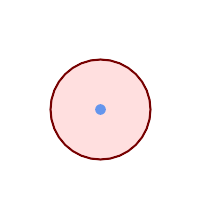

Ademas, para posicionar este bounding box, inicialmente partiremos buscando un punto intermedio de las coordenadas de destino entre las tres regiones, esto se puede ver en el bloque de codigo de abajo. Para esto se utilizará la funcion AVG, ST_X y ST_Y mencionadas anteriormente.

In [17]:
# using select stmt
print("Se obtine los puntos medios tanto de origen, como de destino de las distintas regiones")
q5="""
Select 
	region,
	AVG(ST_X(origin_coord)) as AV_OX,
    AVG(ST_Y(origin_coord)) as AV_OY,
    AVG(ST_X(destination_coord)) as AV_DX,
    AVG(ST_Y(destination_coord)) as AV_DY
from trips
where region in(select region from trips)
group by region
order by region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q5)
for result in results:
    print(result)

Se obtine la distnacia media entre lso puntos de origen y destino
MYSQL data base connection successfull
Successful Request
('Turin', 7.622983913487338, 45.05619536648674, 7.65543310690867, 45.056379342978225)
('Prague', 14.468346558392136, 50.05956319330096, 14.494512440917756, 50.06501722112767)
('Hamburg', 10.035154715764609, 53.53312925323651, 10.019363678202566, 53.52914238740089)


Una vez obtenido estos puntos se calcula el promedio de las coordenadas (x,y) destino de las 3 regiones lo cual nos da los siguientes resultados.

- x_o=10.70882839588136 "coordenada de origen eje x"
- y_o=49.549629271008065 "coordenada de origen eje y"
- x_d= 10.723103075342998 "coordenada destino eje x"
- y_d =  49.55017965050226 "coordenada destino eje y"

Tomando los ultimos dos puntos podemos proseguir!!

En este codigo podemos visualizar una gran cantidad de funciones, pero empecemos por el principio.  Le pedimos a la base de datos del servidor que nos retorne la region, la semana y una suma. Esta suma va a estar compuesta por los puntos que estan dentro ed la bounding box que definimos, para esto utilizamos las funciones ST_Geomfromtext,st_buffer y st_within.

1.- La función **ST_Geomfromtext**  pasa los datos a un estilo de dato text con la definimos nuestro punto central para el bounding box. 

2.-La función **st_buffer** crea un un poligono en la cual definimos una distancia desde su centro mediante un radio que en este caso es 5.4, este valor trata de tomar la mahyor cantidad de puntos, pero se puede variar segun los requerimientos que se necesite.

3.- La función ** ST_within** nos entrega un valor TRUE o FALSE si es que  los puntos del destino estan dentro del bounding box que difinimos.

Finalmente, medinate una suma sumamos todos los valores true y los rdenamos por region y semana dejando los resultados de manera descendiente.



In [12]:
print("Se obtine la cantidad de viajes por semana, region y un bounding box definido")

q6="""
select 
	region,
    week(datetime) as WK,
	sum(st_within(destination_coord,st_buffer(st_Geomfromtext('POINT(10.723103075342998 49.55017965050226)'),5.4))) as bounding_box
from trips 
where region in (select region from trips)
group by region, wk
order by wk DESC , region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q6)

for result in results:
    print(result)

Se obtine la cantidad de viajes por semana, region y un bounding box definido
MYSQL data base connection successfull
Successful Request
('Turin', 21, Decimal('1'))
('Prague', 21, Decimal('3'))
('Hamburg', 21, Decimal('6'))
('Turin', 20, Decimal('2'))
('Prague', 20, Decimal('8'))
('Hamburg', 20, Decimal('6'))
('Turin', 19, Decimal('2'))
('Prague', 19, Decimal('6'))
('Hamburg', 19, Decimal('6'))
('Turin', 18, Decimal('2'))
('Prague', 18, Decimal('9'))
('Hamburg', 18, Decimal('6'))
('Turin', 17, Decimal('2'))
('Prague', 17, Decimal('8'))
('Hamburg', 17, Decimal('4'))


**Comentarios**


Cabe destacar un par de puntos, se define este estilo de bounding box como un círculo ya que tendremos el número de viajes que existe por región y semana dentro de esa zona definida, pero esto igual se podría realizar creando un cuadrado o rectángulo en donde mediante el comando **linestring** se podrían unir creando rectángulos y luego aplicaría la técnica de **RTREE**, pero dado que solo se nos pedía un bounding box se utilizó la función **st_buffer**.

Por otra parte, para adelantarnos a la pregunta 3, lo peor que se podría realizar en este código es crear alguna clausula que calcule la distancia ya que con millones de datos esto tomaría mucho tiempo y siempre es mejor utilizar las funciones que ya están optimizadas, esto nos ahorra tiempo y un menor coste computacional.

Se dejará en otro bloque de código como se retorna estos de verdadero y falso si es que están dentro del bounding box



In [14]:
# using select stmt  POINT(14.66689257396927 50.03751904953268)
print("Se obtine los resultados de TRUE o FALSE de los que estan definido por un bounding box definido y ordenado por region y semana ")
q1="""
select 
	region,
    week(datetime) as WK,
	st_within(destination_coord,st_buffer(st_Geomfromtext('POINT(10.723103075342998 49.55017965050226)'),5.4))
from trips 
order by wk DESC , region DESC;
"""
connection=create_db_connection("127.0.0.1","root",pw,port,dbn)
results=read_query(connection,q1)
for result in results:
    print(result)

Se obtine los resultados de TRUE o FALSE de los que estan definido por un bounding box definido y ordenado por region y semana 
MYSQL data base connection successfull
Successful Request
('Turin', 21, 0)
('Turin', 21, 0)
('Turin', 21, 1)
('Turin', 21, 0)
('Turin', 21, 0)
('Turin', 21, 0)
('Prague', 21, 1)
('Prague', 21, 1)
('Prague', 21, 1)
('Hamburg', 21, 1)
('Hamburg', 21, 1)
('Hamburg', 21, 1)
('Hamburg', 21, 1)
('Hamburg', 21, 1)
('Hamburg', 21, 1)
('Turin', 20, 1)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 0)
('Turin', 20, 1)
('Turin', 20, 0)
('Turin', 20, 0)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Prague', 20, 1)
('Hamburg', 20, 1)
('Hamburg', 20, 1)
('Hamburg', 20, 1)
('Hamburg', 20, 1)
('Hamburg', 20, 1)
('Hamburg', 20, 1)
('Turin', 19, 0)
('Turin', 19, 0)
('Turin', 19, 1)
('Turin', 19, 

## Respuesta pregunta 2.b "Informar sobre el estado de la ingesta de datos sin utilizar una solución de polling"


Para poder realizar esta problema, hay que definir ciertas cosas al momento de informar sobre el estado de ingesta de datos se puede hacer mediante distintas tecnicas las cuales pueden ser mediante una API o webhook. Dado que no hay mas dato de como se quiere desarrollar este problema, se opta por la solución mas sencilla y facil la cual consiste en el **WEBHOOK** la cual nos actulizará sobre la ingesta de datas sin la necesidad de realizar un polling, ademas existen distitan aplicaciones que nos permiten la aplicación del webhook de manera sencilla y rapida.

Para poder implementar el **Webhook** se necesita tener las siguientes un sistema de notificaciones el cual nos indicará si existe algun cambio o no con la base de datos, ademas esta notificación de ser necesario puede llegar a distintos servidores o usuarios facilitando la comunicación. 

Para poder generar un webhook se necesita tener puentes o tuneles desde la base de datos con los usuario o servidores que se le quiere notificar.

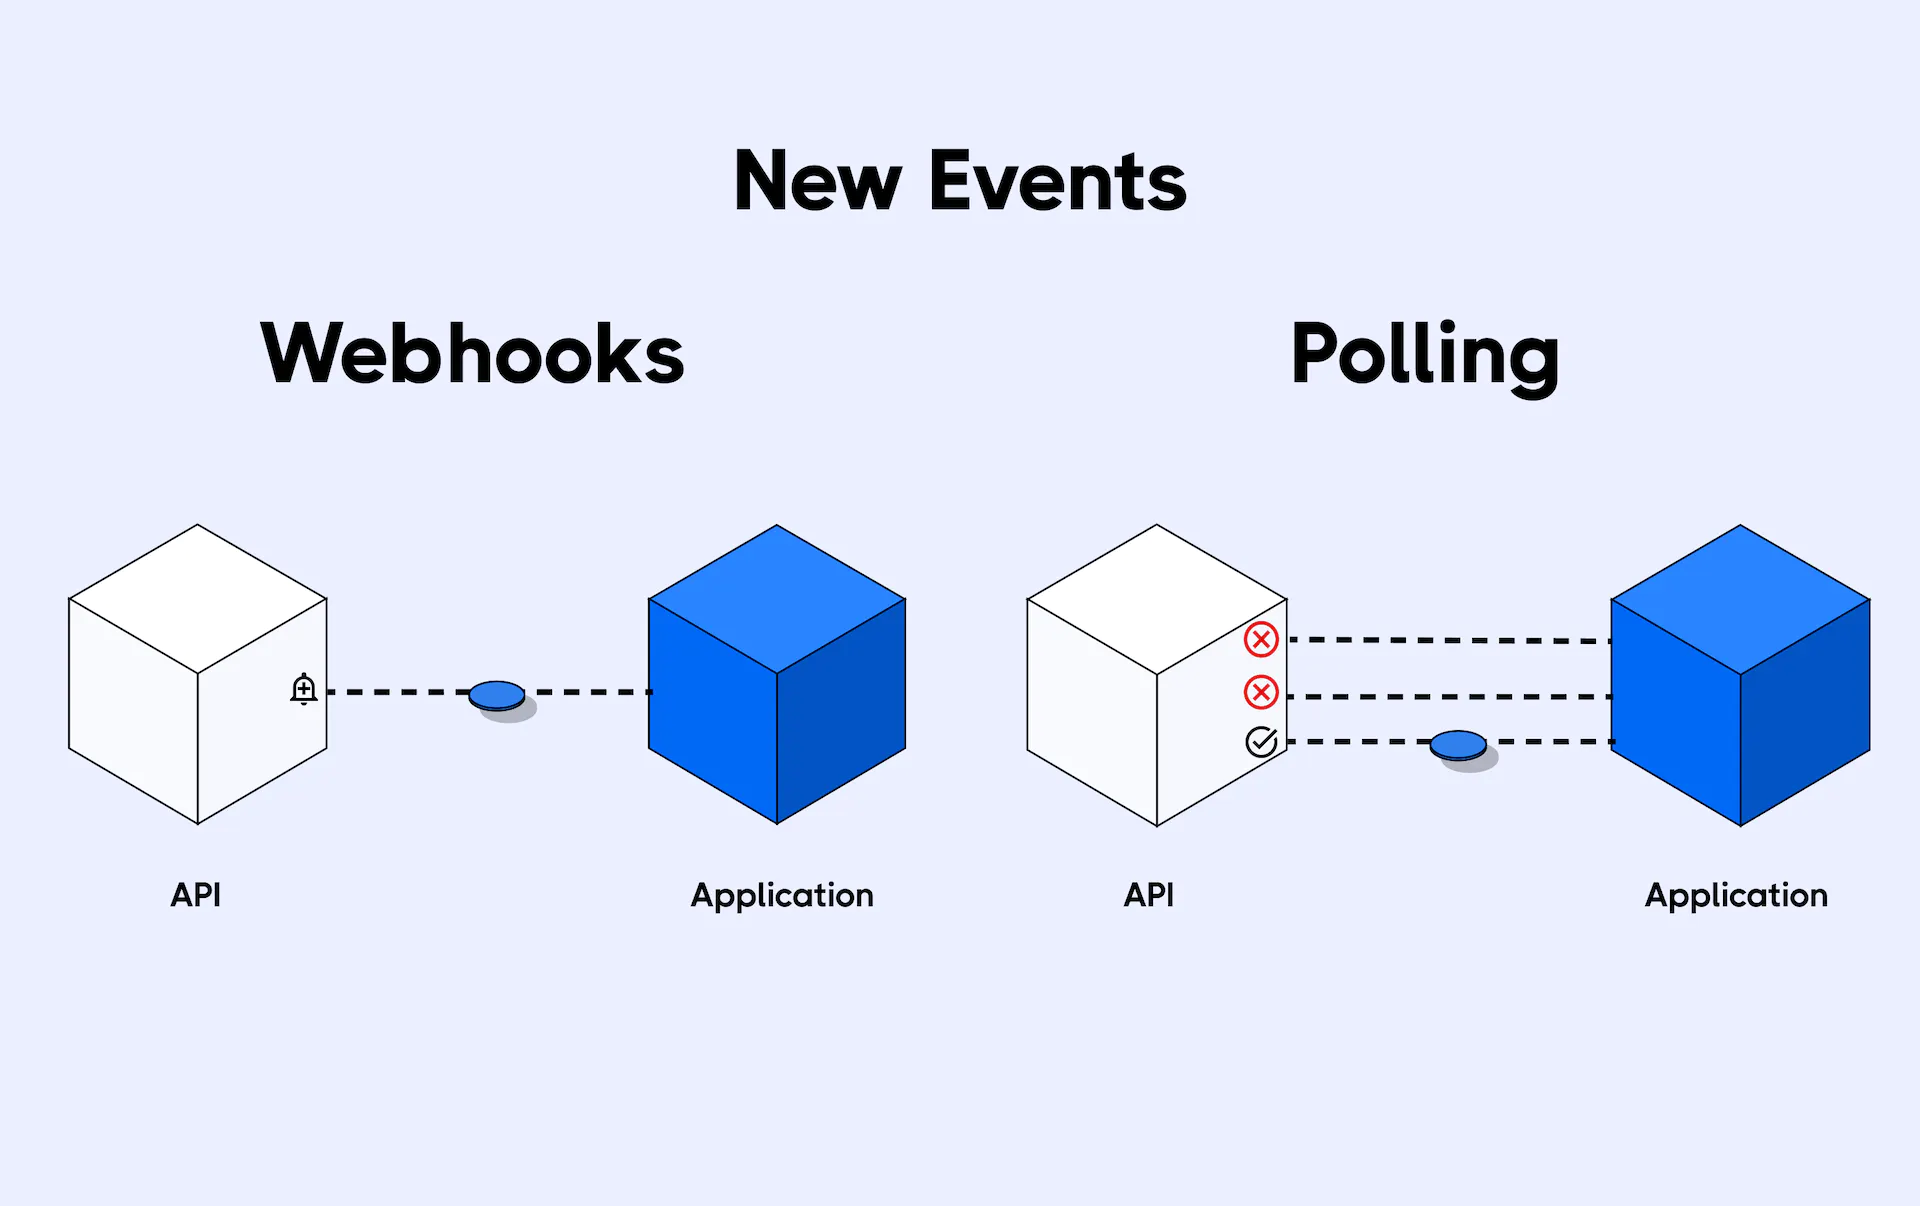
ref:  https://stories.salesforcecodex.com/2022/09/interview-tips/difference-between-webhook-and-api-polling/


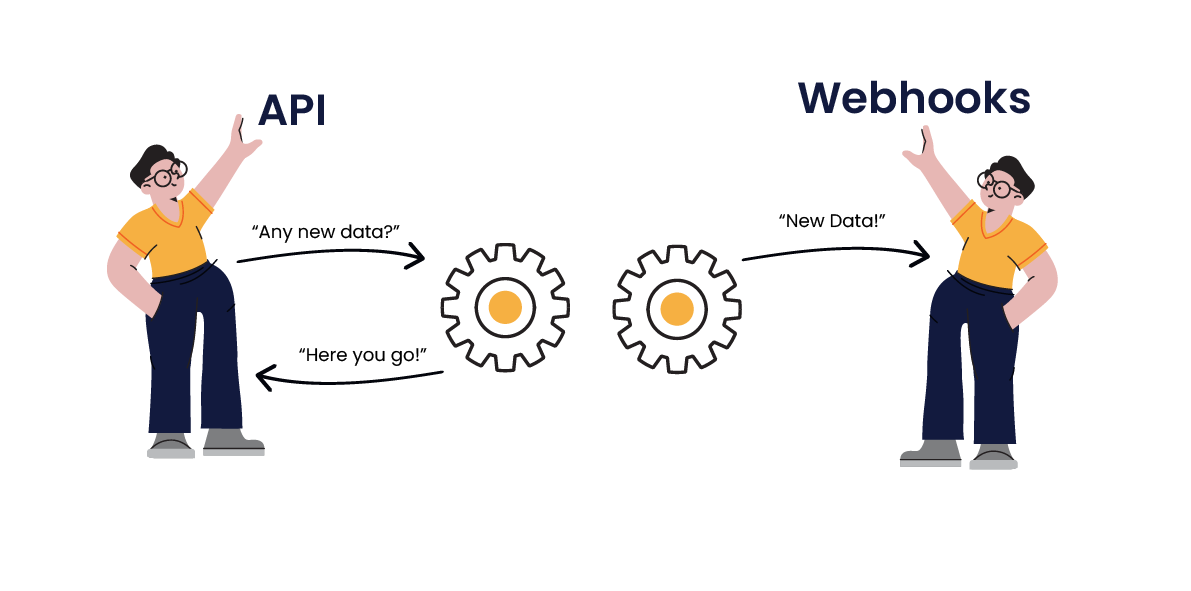
ref:https://buttercms.com/blog/webhook-vs-api-whats-the-difference/

Para generar esta conexion se utilizará la herraminata de ngrok, "ngrok nos permite exponer a internet una URL generada dinámicamente, la cual apunta a un servicio web que se está ejecutando en nuestra máquina local"[1], por otra parte para generar se debe crear el puente entre los servidores la cual se ve en la siguiente imagen.
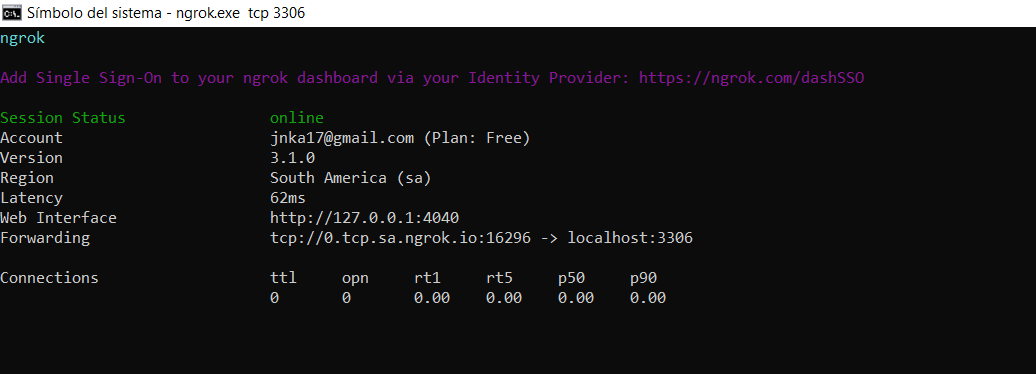

[1] ref:https://www.sdos.es/blog/ngrok-una-herramienta-con-la-que-hacer-publico-tu-localhost-de-forma-facil-y-rapida

Se debe crear un nuevo archivo de sql que estará de manera local y en donde nos conectaremos con el webhook, como se ve en la siguiente imagen 
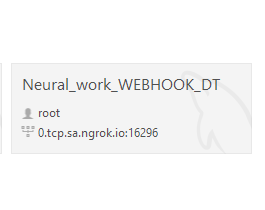

Ahora nos podemos conectar a este servidor defineidno con las mismas funciones utilizadas anteriormente, pero esta vez cambiando el nombre del localhost y el puerto. 

Para poder ver este resultado repetiremos el problema 2.a y visualziaremos sus resultados.

In [15]:
# using select stmt
print("Se obtine los puntos medios tanto de origen, como de destino de las distintas regiones")
q5="""
select 
	region,
    week(datetime) as WK,
	sum(st_within(destination_coord,st_buffer(st_Geomfromtext('POINT(10.723103075342998 49.55017965050226)'),5.4))) as bounding_box
from trips 
where region in (select region from trips)
group by region, wk
order by wk DESC , region DESC;
"""
connection=create_db_connection("0.tcp.sa.ngrok.io","root",pw,16296,dbn)
results=read_query(connection,q5)
for result in results:
    print(result)

Se obtine los puntos medios tanto de origen, como de destino de las distintas regiones
MYSQL data base connection successfull
Successful Request
('Turin', 21, Decimal('1'))
('Prague', 21, Decimal('3'))
('Hamburg', 21, Decimal('6'))
('Turin', 20, Decimal('2'))
('Prague', 20, Decimal('8'))
('Hamburg', 20, Decimal('6'))
('Turin', 19, Decimal('2'))
('Prague', 19, Decimal('6'))
('Hamburg', 19, Decimal('6'))
('Turin', 18, Decimal('2'))
('Prague', 18, Decimal('9'))
('Hamburg', 18, Decimal('6'))
('Turin', 17, Decimal('2'))
('Prague', 17, Decimal('8'))
('Hamburg', 17, Decimal('4'))


In [18]:
# using select stmt
print("Se obtienen los punto min y max de las coordenadas por region y su rango de origen y destino")
q6="""
Select 
	region,
	max(ST_X(origin_coord)) as MAX_OX,
    min(ST_Y(origin_coord)) as MIN_OY,
    max(ST_X(destination_coord)) as MAX_DX,
    min(ST_Y(destination_coord)) as MIN_DY,
    abs(max(ST_X(origin_coord))-max(ST_X(destination_coord))) as Rango_X,
    abs(min(ST_Y(origin_coord))-min(ST_Y(destination_coord))) as Rango_Y,
    count(region)
from trips
where region in(select region from trips)
group by region
order by region DESC;
"""
connection=create_db_connection("0.tcp.sa.ngrok.io","root",pw,16296,dbn)
results=read_query(connection,q6)
for result in results:
    print(result)

Se obtienen los punto min y max de las coordenadas por region y su rango de origen y destino
MYSQL data base connection successfull
Successful Request
('Turin', 7.739660019780326, 44.97612466562052, 7.776838688899015, 44.98171705467543, 0.03717866911868928, 0.005592389054910996, 38)
('Prague', 14.66689257396927, 49.98980557466577, 14.66560032530535, 49.99269705719384, 0.0012922486639190822, 0.0028914825280637046, 34)
('Hamburg', 10.2154964127794, 53.42865933587807, 10.21529787231755, 53.4120717767391, 0.0001985404618505271, 0.01658755913897636, 28)


Una vez realizada esta acción vemos como el sistema nos avisa que hemos realizado cambios
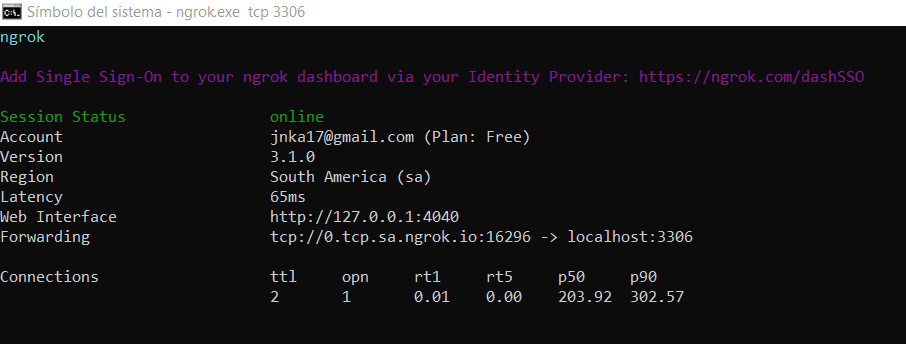

Lo anterior igual se puede realizar mediante un túnel http, pero dado que ahora solo se necesitaba ver la ingesta de datos y cambios en nuestra base de datos con este simple procedimiento podemos saber los cambios que se han generado como también ver desde la base de datos los nuevos datos o incluso generar nuevas funciones!!.

**Comentarios**


Hay que tener en cuenta ciertas situaciones.
Para empezar el programa que estamos utilizando es la versión gratis de ngrok por lo que el túnel que generamos solo nos permite conectarnos con la base de datos en un tiempo limitado, por lo que en caso de conectarse desde otro computador hay que tener en cuenta este periodo de tiempo.

Por otra parte, se puede también ver los cambios desde la interfaz web que nos estrega http://127.0.0.1:4040 y que se visualiza en la siguiente figura 
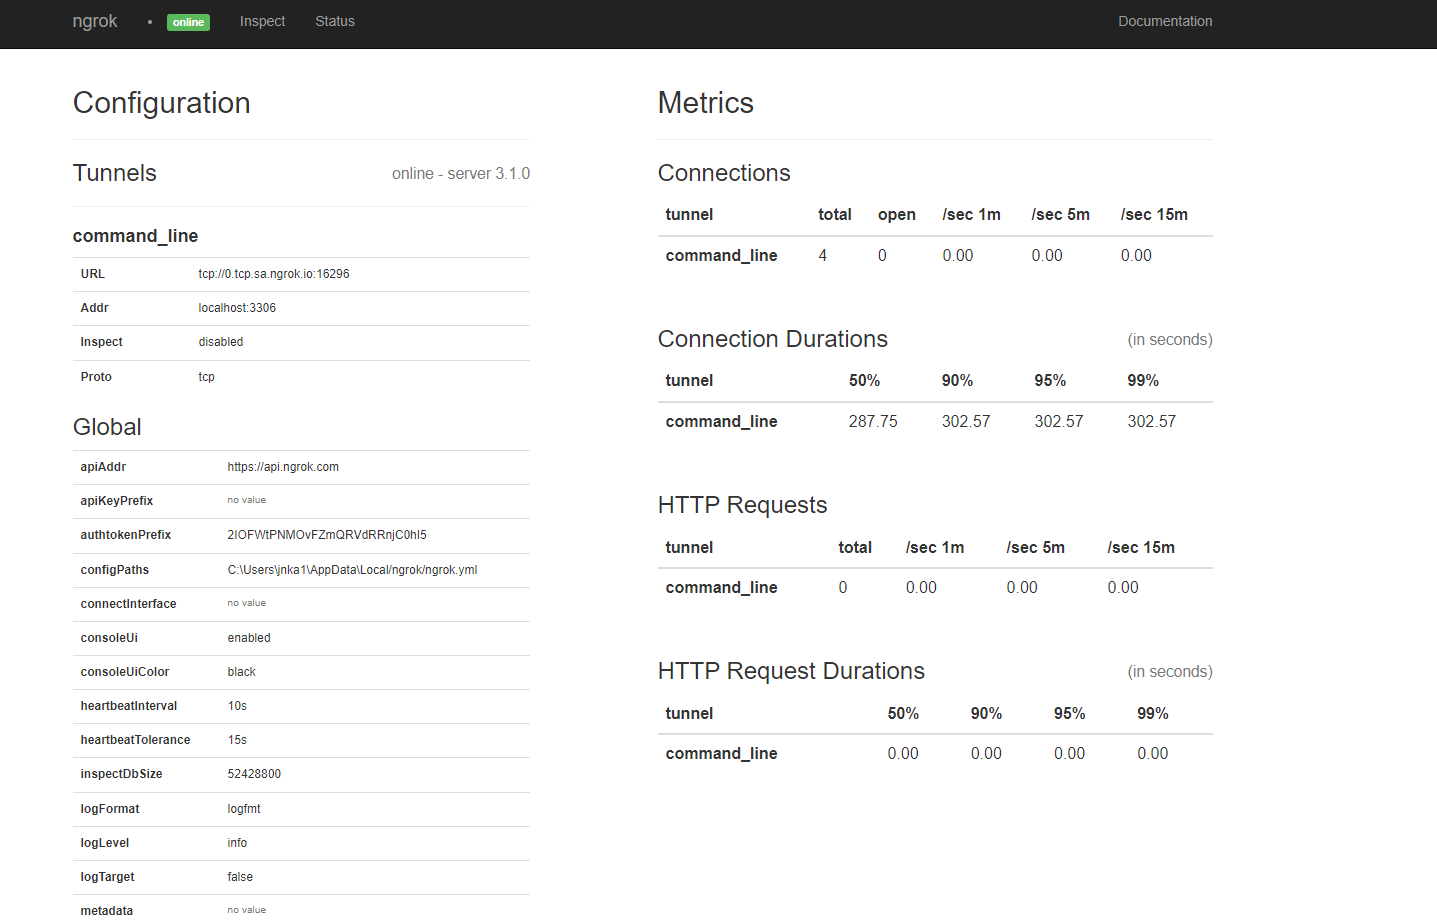


En caso de que se quiera replicar este resultado, por favor conectarme y generar el link para que pueden comprobar la conexión y su funcionamiento

Para más información ingresar al siguiente link: https://ngrok.com/docs/platform/dashboard


# Respuesta Pregunta 3 "La solución debe ser escalable a 100 millones de entradas. Se recomienda simplificar los datos mediante un modelo de datos. Agregue pruebas de que la solución es escalable."

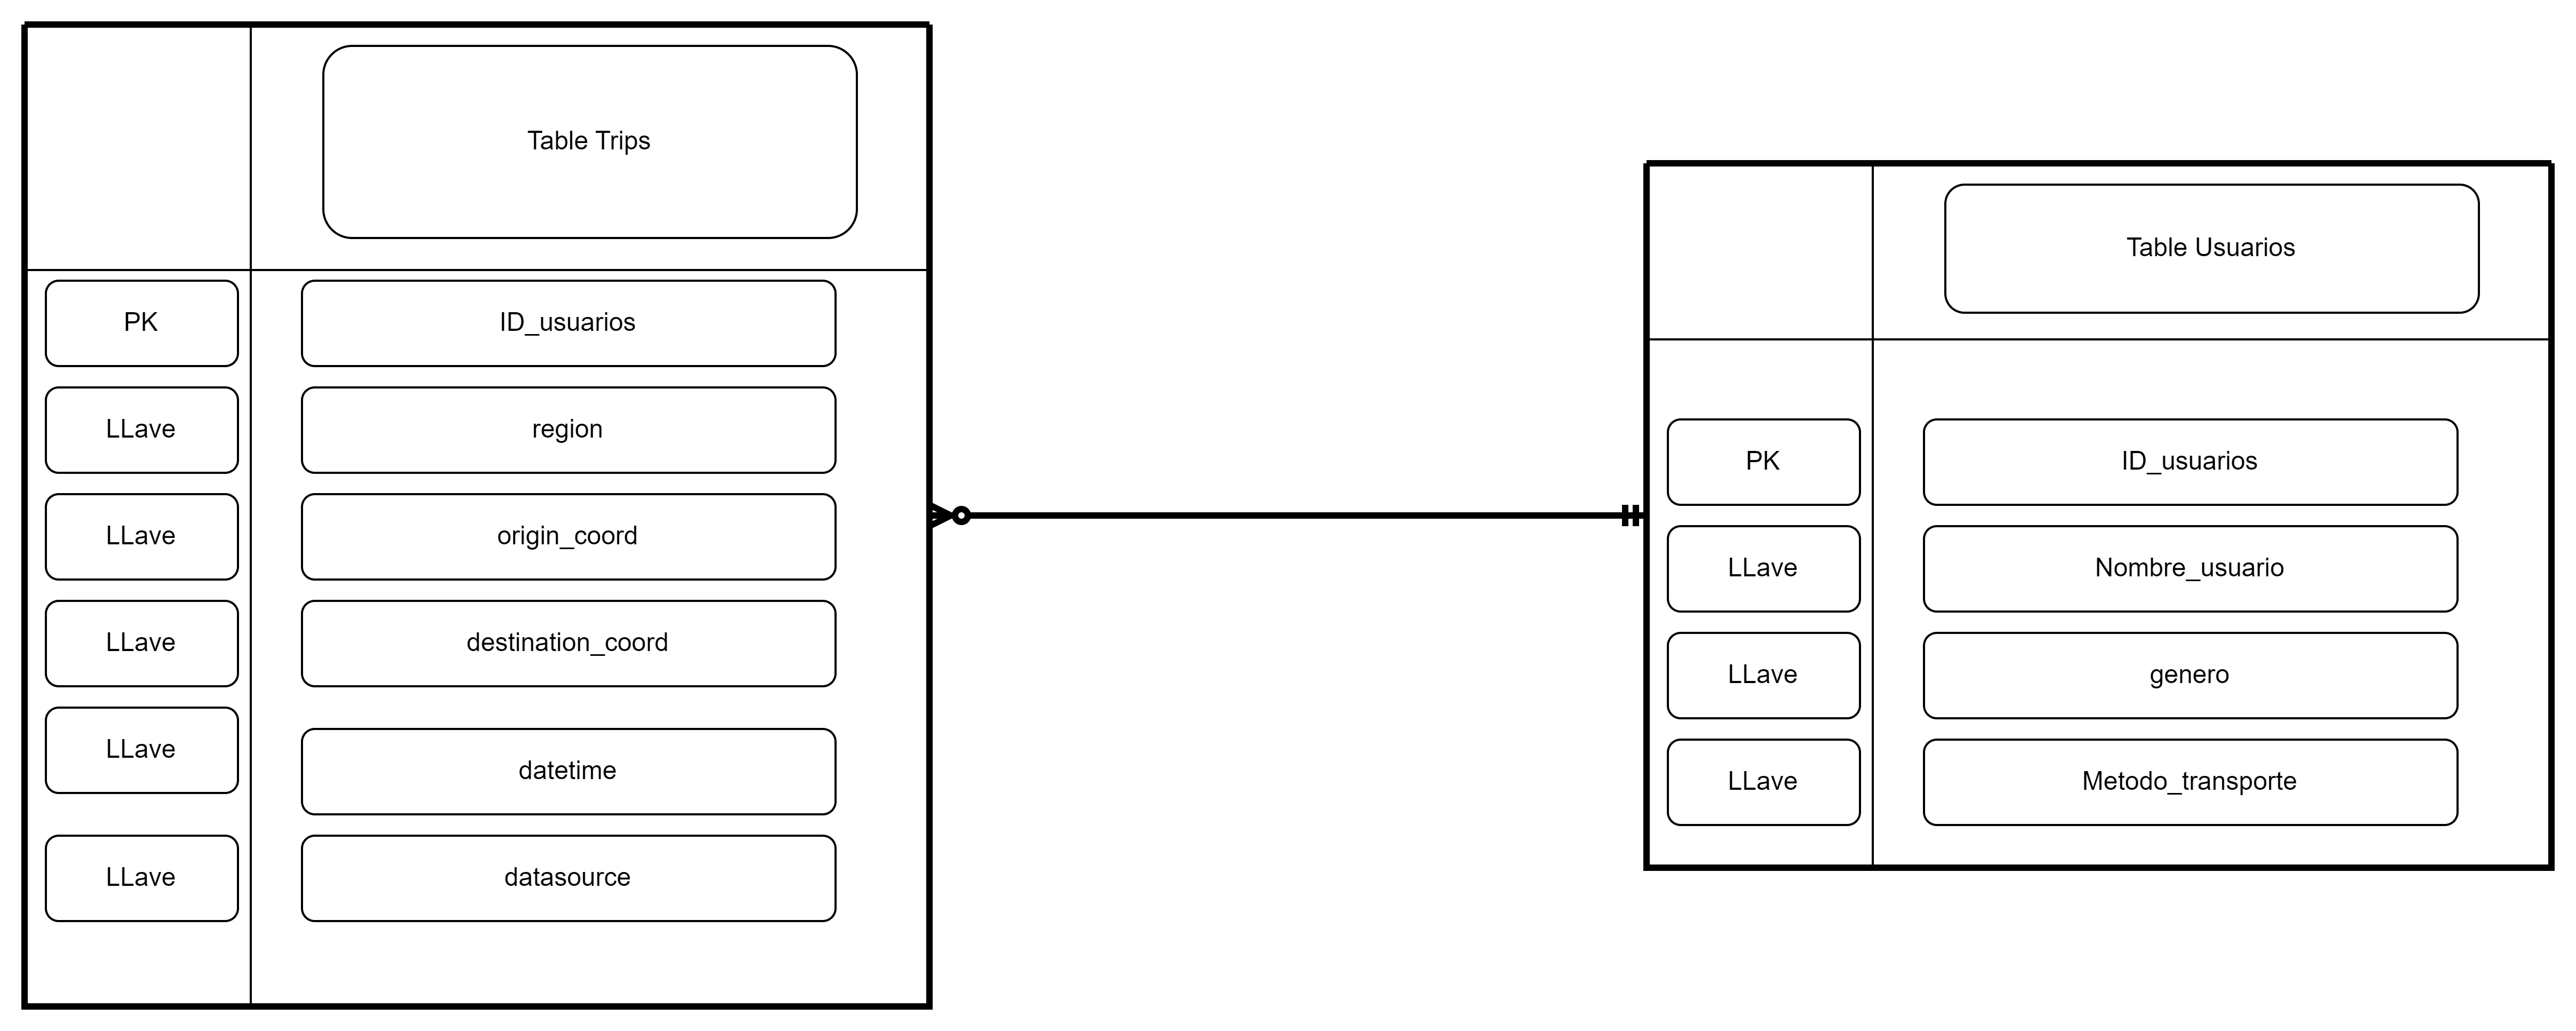


## Se crea un suepuesto 

Se presenta un diagrama de entidad-relación en donde se podrá escalar los datos. Esta vez se quiere saber que usuario está recorriendo cada región para visualizar el flujo de persona por zona y asociarlo a que tipo de transporte utilizan, por ejemplo auto, autobús, motocicleta, etc..

Para poder escalar este trabajo primero se debe generar dos llaves primarias denominadas id_usuarios que nos indicaran a que persona nos estamos refiriendo. Además, para que este trabajo se crea la tabla Usuarios que contiene toda la información de las personas por región la cual llega a ser de varios millones. 

**Comentarios** 

Para poder realizar este análisis y obtener los datos necesarios, lo primero que se debe tener en cuenta es que se deben utilizar la menor cantidad de ciclos for o if posibles para reducir los tiempos de cómputos, además de utilizar la mayor cantidad de funciones integradas en sql y python para desarrollar este trabajo dado que se necesita que todos los códigos estén los más optimizados posibles. 

Por otra parte, para el correcto manejo de estos datos, se le entregaría al data scientist del grupo los datos de manera segmentada, es decir em vez de 100 millones, trabajarlo con 60 o 70 millones incluso menos, teniendo la suposición de los que datos que se trabajan son probabilísticamente representativos.

Cabe destacar que las soluciones presentadas en los problemas 1 y 2, fueron presentadas para poder ser realizadas bajo base de datos mucho mas amplias, por lo que están optimizadas utilizando las funciones de las distintas librerías disminuyendo al máximo tiempo posible los cómputos solicitados. El único problema que podría existir seria con el webhook que entraría en vigencia la latencia con la que uno se conecta al servidor. 


# Respuesta Pregunta 4 "La solución debe estar escrita en Python usando una base de datos SQL."

Se implemneto todo le codigo en python usando una base de datos SQL

# Respuesta Pregunta 5 "Puntos de bonificación si incluye su solución en contenedores y si dibuja cómo configuraría la aplicación en GCP."

Para poder realizar este procedimiento nos basamos en el documento de https://towardsdatascience.com/sql-on-the-cloud-with-python-c08a30807661  

Como se puede ver se trato de conectar con la plataforma de google cloud pero hubo un problema con los archivos ssl que no pude arreglar, esto se debe a la experiencia basica que tengo en la plataforma. Por lo que, me dedicare a arreglarlo en este tiempo ya que debe ser un problema facil de resolver.

Les pido mis disculpas en esta parte, es solo cosa de experiencia con la plataforma.
Pero en caso de que se solucione el tema de los archivos SSL, se podria correr los codigos de abajo y guardar la data dentro de GCP.


In [19]:
from mysql.connector.constants import ClientFlag

In [21]:
config = {
    'user': 'root',
    'password': '123456',
    'host': '34.176.131.65',
    'client_flags': [ClientFlag.SSL],
    'ssl_ca': 'ssl/server-ca.pem',
    'ssl_cert': 'ssl/client-cert.pem',
    'ssl_key': 'ssl/client-key.pem'
}


cnxn = mysql.connector.connect(**config)
print("la conexion fue exitosa")

InterfaceError: 2026 (HY000): SSL connection error: Unable to get certificate

In [ ]:

# Se crea la base de datos 
dbn="mysql_python"
cursor=cnxn.cursor()
cursor.execute('Create database mysql_python')

cnxn.close()


In [ ]:
#se crea la tabla 
cursor.execute("""create table trips(
region varchar(50) not null, 
origin_coord GEOMETRY ,
destination_coord GEOMETRY ,
datetime datetime not null,
datasource varchar(50) not null);""")

cnxn.commit() 

In [ ]:
## insertando la  data

# se pasa a una lista la tabla utilizada, ya que es un requerimiento para insertar los datos desde u archivo csv

df1=df.values.tolist()


# se utiliza la función cursor y execute many para poder insertar los dartos 
cursor().executemany("INSERT INTO trips VALUES(%s,ST_PointFromText(%s),ST_PointFromText(%s),%s,%s);",df1)


# Finalmente commit  termina la accion y guarda en la base de datos los cambios realizados.
cnxn.commit()
